# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Salary Dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Data Understanding 

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

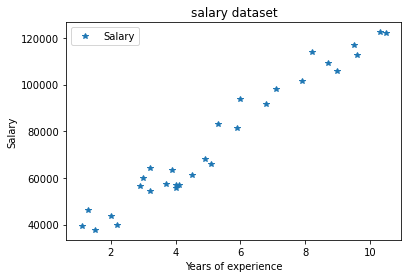

In [4]:
df.plot(x = 'YearsExperience', y = 'Salary', style= '*')
plt.title('salary dataset')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

The graph shows positive linear relation between years of experience and salary 

In [5]:
X = df.iloc[:, :-1].values         #selecting column years of experience
y = df.iloc[:, 1].values           #selecting column salary
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
from sklearn.model_selection import train_test_split   #splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training Algorithm

In [11]:
from sklearn.linear_model import LinearRegression      #training the data
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Completed.")

Training Completed.


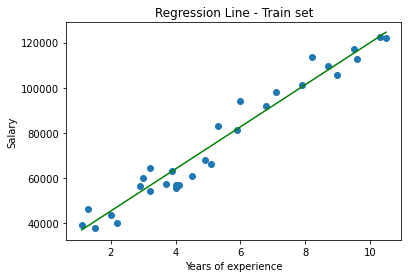

In [12]:
line = regressor.coef_*X+regressor.intercept_          #Plotting the regression line
plt.scatter(X, y)                                      #training dataset regression line
plt.plot(X, line, color = "green");
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Regression Line - Train set",)
plt.show()

Slop of our linear regression line tells us that how much change in y-variable is caused by a unit change in x-variable.

# Making Predictions for Our Salary Dataset

In [13]:
print(X_test)                                          #testing data in years of experience
y_pred = regressor.predict(X_test)                     #predicting salary

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [14]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})     #comparing between test data and predicted data
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


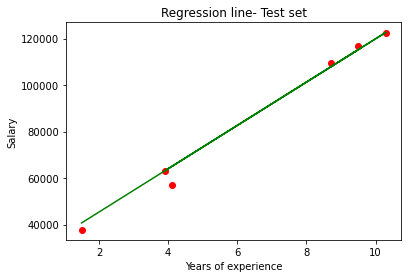

In [16]:
plt.plot(X_test, y_pred, color = "green") 
plt.scatter(X_test, y_test, color = "red")                      #using scatter plot for test data set
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Regression line- Test set")
plt.show()

# Evaluation of Model

### Accuracy of the model

In [17]:
from sklearn import metrics                                             #Calculating Accuracy of the model
metrics.r2_score(y_test, y_pred)

0.988169515729126

Accuracy of our model is 98%

### Prediction of Salary 

In [19]:
predict_score = regressor.predict([[8.2]])
print("Salary for given 8.2 years of experience is: ", predict_score)

Salary for given 8.2 years of experience is:  [103143.21518981]


In [20]:
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 12823412.298126562


The mean squared error(MSE) tells you how close a regression line is to a set of points.

It does this by taking the distances from the points to the regression line(These distances are the residuals(errors)) and squaring them.

It's called mean squared error as you're finding the average of a set of errors.